# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [7]:
data = pd.read_csv('weight-height.csv')
male_df =  data.query("Gender == 'Male'")
female_df =  data.query("Gender == 'Female'")

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [9]:
female_df.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

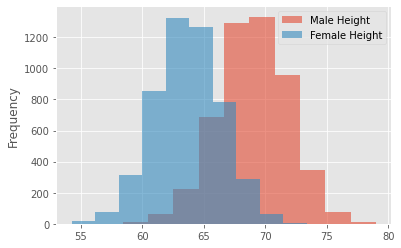

In [26]:
plt.figure()
male_df['Height'].plot.hist(alpha=0.6)
female_df['Height'].plot.hist(alpha=0.6)
plt.legend(['Male Height', 'Female Height'])

# Record your observations - are these inline with your personal observations?

The distributions are similar in shape with female heights centered around a slightly short height than male heights, which is consistent with experience. 

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

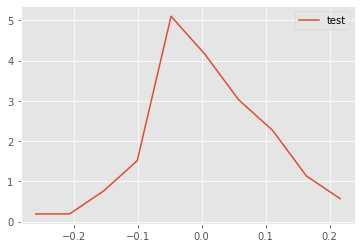

In [24]:
def density(x):
    n, bins = np.histogram(x, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = (bins[k]+bins[k+1])/2
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
x,y
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

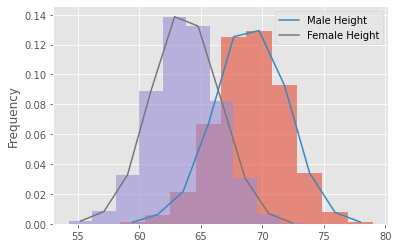

In [30]:
# Your code here 
plt.figure()
male_df['Height'].plot.hist(alpha=0.6, density=1)
x1,y1 = density(male_df['Height'])
plt.plot(x1,y1)
plt.legend()
female_df['Height'].plot.hist(alpha=0.6, density=1)
x2,y2 = density(female_df['Height'])
plt.plot(x2,y2)
plt.legend(['Male Height', 'Female Height'])

## Repeat the above exercise for male and female weights

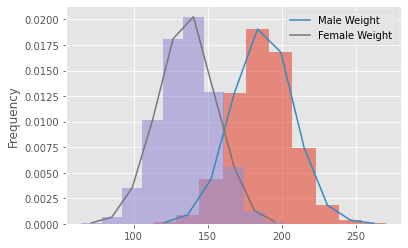

In [31]:
# Your code here 
plt.figure()
male_df['Weight'].plot.hist(alpha=0.6, density=1)
x1,y1 = density(male_df['Weight'])
plt.plot(x1,y1)
plt.legend()
female_df['Weight'].plot.hist(alpha=0.6, density=1)
x2,y2 = density(female_df['Weight'])
plt.plot(x2,y2)
plt.legend(['Male Weight', 'Female Weight'])

## Write your observations in the cell below

# Record your observations - are these inline with your personal observations?
The distributions are similar in shape with female heights and weights centered around a slightly smaller value than male values, which is consistent with experience.

# What is the takeaway when comparing male and female heights and weights?

Women are slightly smaller than men on average.

## Repeat the above experiments in seaborn and compare with your results

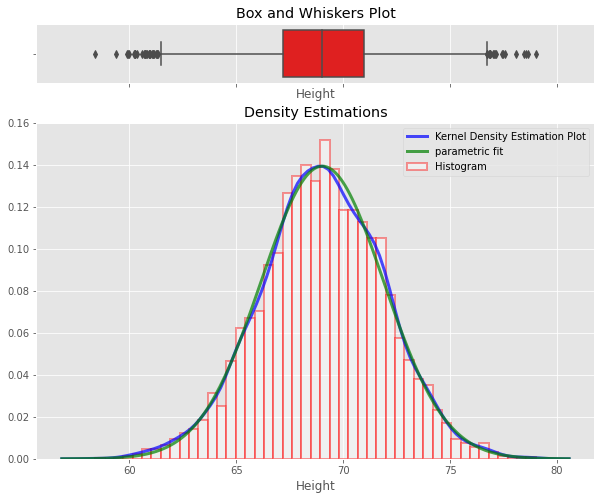

In [37]:
data = male_df
# Code for heights here
import scipy.stats as stats
import seaborn as sns
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(data.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .16))
plt.ylim(0,0.16)
plt.legend();

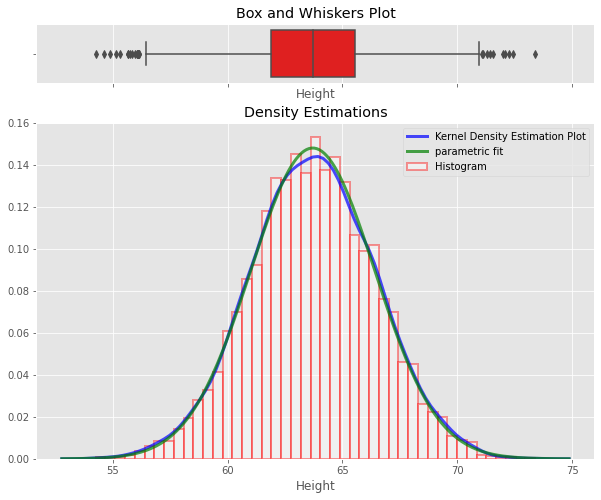

In [38]:
# Code for weights here
data = female_df
# Code for heights here
import scipy.stats as stats
import seaborn as sns
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(data.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .16))
plt.ylim(0,0.16)
plt.legend();

# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
Seaborn looks better.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.